<h3> Library validation with Anylogistix </h3>


We have created a single node supply chain model in Anylogistix, and implemented the same using SupplyNetPy.
We have increamentally added more nodes to the system to increase its complexity.

We have noted observations from this experiment in this notebook as we proceeded with the implementations.

In [1]:
# let us first import the libraries
# local import for convinience
import sys, os
sys.path.insert(1, '../src/SupplyNetPy/Components/')
import core as scm
import utilities as scm

def print_performance_metrics(supplychainnet):
    print("Performance Metrics:")
    print("Total Available Inventory:", supplychainnet["total_available_inv"])
    print("Average Available Inventory:", supplychainnet["avg_available_inv"])
    print("Total Inventory Carry Cost:", supplychainnet["total_inv_carry_cost"])
    print("Total Inventory Spend:", supplychainnet["total_inv_spend"])
    print("Total Transport Cost:", supplychainnet["total_transport_cost"])
    print("Total Revenue:", supplychainnet["total_revenue"])
    print("Total Cost:", supplychainnet["total_cost"])
    print("Total Profit:", supplychainnet["total_profit"])
    print("Total Demand Placed by Customers:", supplychainnet["total_demand_placed_by_customers"])
    print("Total Fulfillment Received by Customers:", supplychainnet["total_fulfillment_received_by_customers"])
    print("Total Demand Placed by Site:", supplychainnet["total_demand_placed_by_site"])
    print("Total Fulfillment Received by Site:", supplychainnet["total_fulfillment_received_by_site"])
    print("Total Demand Placed:", supplychainnet["total_demand_placed"])
    print("Total Fulfillment Received:", supplychainnet["total_fulfillment_received"])
    print("Average Cost per Order:", supplychainnet["avg_cost_per_order"])
    print("Average Cost per Item:", supplychainnet["avg_cost_per_item"])

In [2]:
"""
Single Echelon Single node

Product: Nasal Spray
    Sell price: 30
    Cost: 24

Network consists of one supplier, one distributor and demand at the distributor
Supplier: Infinite supplier
    loc: Vasco
Distributor1: 
    loc: Mumbai
    replenish policy: (s=500, S=1000), ini = 1000
    Dist to supplier: 570 km (11 hrs)
    delivery lead time: 1 day

Distributor2:
    loc: Dharwad
    replenish policy: (s=400, S=800), ini = 800
    delivery lead time: 1 day

Customers are added:
    1. Pune: order interval: 7 days, order quantity: 50, lead time: 0.9 days
    2. Kalyan: order interval: 3 days, order quantity: 35, lead time: 0.9 days
    3. Thane: order interval: 2 days, order quantity: 30, lead time: 0.9 days
    4. Panvel: order interval: 5 days, order quantity: 65, lead time: 0.9 days
    5. Hubli: order interval: 7 days, order quantity: 60, lead time: 0.9 days
    6. Khanapur: order interval: 5 days, order quantity: 25, lead time: 0.9 days
    7. Belgavi: order interval: 3 days, order quantity: 30, lead time: 0.9 days
"""
import simpy
import numpy as np
import matplotlib.pyplot as plt

env = simpy.Environment()
supplier = scm.Supplier(env=env, ID='S1', name='Supplier', node_type="infinite_supplier")

mouse = scm.Product(ID="MW11", name="Toad M11", manufacturing_cost=150, 
                             manufacturing_time=1, sell_price=300, buy_price=150,
                             raw_materials=[], units_per_cycle=3000) # create a default product

distributor = scm.InventoryNode(env=env, ID='D1', name='Mumbai Warehouse', node_type="warehouse", 
                                capacity=1000, initial_level=1000, inventory_holding_cost=0.22, product=mouse,
                                replenishment_policy=scm.SSReplenishment, policy_param={'s':500,'S':1000}, 
                                product_buy_price=150, product_sell_price=300)

distributor2 = scm.InventoryNode(env=env, ID='D2', name='Dharwad Warehouse', node_type="warehouse", 
                                capacity=800, initial_level=800, inventory_holding_cost=0.22, product=mouse,
                                replenishment_policy=scm.SSReplenishment, policy_param={'s':400,'S':800}, 
                                product_buy_price=150, product_sell_price=300)

link = scm.Link(env=env, ID='L1', source=supplier, sink=distributor, cost=10, lead_time=lambda: 1)
link2 = scm.Link(env=env, ID='L2', source=supplier, sink=distributor2, cost=10, lead_time=lambda: 1)

demand1 = scm.Demand(env=env, ID='demand_D1', name='Demand Pune', order_arrival_model=lambda: 7, 
                        order_quantity_model=lambda:50, delivery_cost=lambda:10, lead_time=lambda:1, 
                        demand_node=distributor)
demand2 = scm.Demand(env=env, ID='demand_D2', name='Demand Kalyan', order_arrival_model=lambda: 3, 
                        order_quantity_model=lambda:35, delivery_cost=lambda:10, lead_time=lambda:1, 
                        demand_node=distributor)
demand3 = scm.Demand(env=env, ID='demand_D3', name='Demand Thane', order_arrival_model=lambda: 2, 
                        order_quantity_model=lambda:30, delivery_cost=lambda:10, lead_time=lambda:1, 
                        demand_node=distributor)
demand4 = scm.Demand(env=env, ID='demand_D4', name='Demand Panvel', order_arrival_model=lambda: 5, 
                        order_quantity_model=lambda:65, delivery_cost=lambda:10, lead_time=lambda:1, 
                        demand_node=distributor)
demand5 = scm.Demand(env=env, ID='demand_D5', name='Demand Hubli', order_arrival_model=lambda: 7, 
                        order_quantity_model=lambda:60, delivery_cost=lambda:10, lead_time=lambda:1, 
                        demand_node=distributor2)
demand6 = scm.Demand(env=env, ID='demand_D6', name='Demand Khanapur', order_arrival_model=lambda: 5, 
                        order_quantity_model=lambda:25, delivery_cost=lambda:10, lead_time=lambda:1, 
                        demand_node=distributor2)
demand7 = scm.Demand(env=env, ID='demand_D7', name='Demand Belgavi', order_arrival_model=lambda: 3, 
                        order_quantity_model=lambda:30, delivery_cost=lambda:10, lead_time=lambda:1, 
                        demand_node=distributor2)
scm.global_logger.enable_logging()
env.run(until=59)

INFO sim_trace - 0.0000:demand_D1:Customer0:Demand at Mumbai Warehouse, Order quantity:50, available.
INFO sim_trace - 0.0000:demand_D2:Customer0:Demand at Mumbai Warehouse, Order quantity:35, available.
INFO sim_trace - 0.0000:demand_D3:Customer0:Demand at Mumbai Warehouse, Order quantity:30, available.
INFO sim_trace - 0.0000:demand_D4:Customer0:Demand at Mumbai Warehouse, Order quantity:65, available.
INFO sim_trace - 0.0000:demand_D5:Customer0:Demand at Dharwad Warehouse, Order quantity:60, available.
INFO sim_trace - 0.0000:demand_D6:Customer0:Demand at Dharwad Warehouse, Order quantity:25, available.
INFO sim_trace - 0.0000:demand_D7:Customer0:Demand at Dharwad Warehouse, Order quantity:30, available.
INFO sim_trace - 1.0000:D1: Inventory levels:820
INFO sim_trace - 1.0000:D2: Inventory levels:685


INFO sim_trace - 1.0000:demand_D1:Customer0:Demand at Mumbai Warehouse, Order quantity:50 received. Current inv: 820
INFO sim_trace - 1.0000:demand_D2:Customer0:Demand at Mumbai Warehouse, Order quantity:35 received. Current inv: 820
INFO sim_trace - 1.0000:demand_D3:Customer0:Demand at Mumbai Warehouse, Order quantity:30 received. Current inv: 820
INFO sim_trace - 1.0000:demand_D4:Customer0:Demand at Mumbai Warehouse, Order quantity:65 received. Current inv: 820
INFO sim_trace - 1.0000:demand_D5:Customer0:Demand at Dharwad Warehouse, Order quantity:60 received. Current inv: 685
INFO sim_trace - 1.0000:demand_D6:Customer0:Demand at Dharwad Warehouse, Order quantity:25 received. Current inv: 685
INFO sim_trace - 1.0000:demand_D7:Customer0:Demand at Dharwad Warehouse, Order quantity:30 received. Current inv: 685
INFO sim_trace - 2.0000:D1: Inventory levels:820
INFO sim_trace - 2.0000:D2: Inventory levels:685
INFO sim_trace - 2.0000:demand_D3:Customer1:Demand at Mumbai Warehouse, Order qu

Performance Metrics:
Total Available Inventory: 1390
Average Available Inventory: 1269.406779661017
Total Inventory Carry Cost: 16476.9
Total Inventory Spend: 579000
Total Transport Cost: 1200
Total Revenue: 1272000
Total Cost: 596676.9
Total Profit: 675323.1
Total Demand Placed by Customers: [112, 4270]
Total Fulfillment Received by Customers: [111, 4240]
Total Demand Placed by Site: [8, 3860]
Total Fulfillment Received by Site: [8, 3860]
Total Demand Placed: [120, 8130]
Total Fulfillment Received: [119, 8100]
Average Cost per Order: 4972.3075
Average Cost per Item: 73.3919926199262
Performance:
	Available Inventory: [inf, 790, 600], Total = inf
	Inventory cost: [0, 8907.8, 7569.100000000002], Total = 16476.9
	Inventory Spend: [0, 393000, 186000], Total = 579000
	Transportation cost: [0, 50, 30, 90, 200, 300, 120, 90, 120, 200], Total = 1200
	Total cost: [0, 401957.8, 193599.1, 90, 200, 300, 120, 90, 120, 200], Total = 596676.9
	Total #products sold: [450, 700, 870, 780, 540, 300, 600

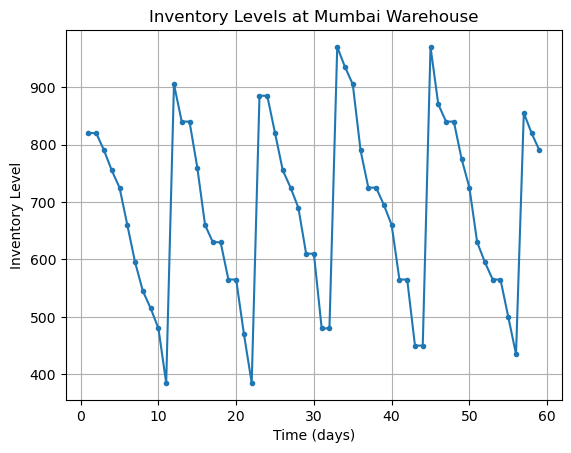

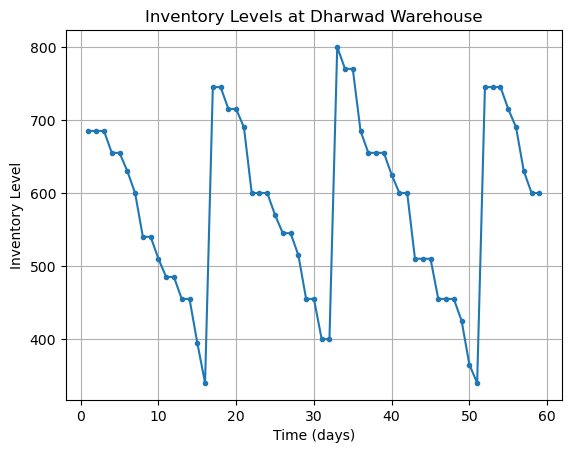

In [3]:
nodes = [supplier, distributor, distributor2]
links =  [link, link2]
demands = [demand1, demand2, demand3, demand4, demand5, demand6, demand7]
supplychainnet = scm.create_sc_net(nodes, links, demands)
supplychainnet = scm.simulate_sc_net(supplychainnet, sim_time=365)
print_performance_metrics(supplychainnet)

available_inventory = []
inventory_costs = []
inventory_spends = []
tranportation_costs = []
total_costs = []
total_units_sold = []

for node in nodes:
    available_inventory.append(node.inventory.inventory.level)
    inventory_costs.append(node.inventory_cost)
    inventory_spends.append(sum([x[1] for x in node.inventory.inventory_spend]))
    tranportation_costs.append(sum([x[1] for x in node.transportation_cost]))
    total_costs.append(node.node_cost)

for demand in demands:
    if(demand.transportation_cost):
        tranportation_costs.append(demand.node_cost)
        total_units_sold.append(demand.total_products_sold)
        total_costs.append(demand.node_cost)


print(f"Performance:")
print(f"\tAvailable Inventory: {available_inventory}, Total = {sum(available_inventory)}")
print(f"\tInventory cost: {inventory_costs}, Total = {sum(inventory_costs)}")
print(f"\tInventory Spend: {inventory_spends}, Total = {sum(inventory_spends)}")
print(f"\tTransportation cost: {tranportation_costs}, Total = {sum(tranportation_costs)}")

print(f"\tTotal cost: {total_costs}, Total = {sum(total_costs)}")
print(f"\tTotal #products sold: {total_units_sold}, Total = {sum(total_units_sold)}")
print(f"\tSell price: {mouse.sell_price}")
revenue = sum(total_units_sold) * mouse.sell_price
print(f"\tTotal revenue: {revenue}")
print(f"\tNet profit (Totalcost - Revenue): {revenue - sum(total_costs)}")


for node in nodes:
    if("supplier" in node.node_type):
        continue
    inv_levels = np.array(node.inventory.instantaneous_levels)
    plt.plot(inv_levels[:,0],inv_levels[:,1], label=node.name, marker='.')
    plt.title(f'Inventory Levels at {node.name}')
    plt.xlabel('Time (days)')
    plt.ylabel('Inventory Level')
    plt.grid() # add grid
    plt.show()